In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions
from pylab import rcParams

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


In [3]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap

In [4]:
x,y = make_circles(n_samples = 250, noise = 0.1,random_state = 6)

In [5]:
x

array([[-9.35160849e-01,  2.82957315e-01],
       [ 8.97879170e-01, -6.69401273e-01],
       [-3.23119350e-01,  8.50857934e-01],
       [-5.95883564e-01,  6.42309366e-01],
       [ 6.89688368e-01,  2.86257510e-04],
       [-7.83966256e-01,  1.22054064e-01],
       [-9.77721660e-01, -7.64264286e-01],
       [ 6.06036122e-01,  7.14706496e-01],
       [-7.33276776e-01, -1.54448514e-02],
       [ 2.30878873e-01, -7.36214132e-01],
       [-5.76128786e-01,  7.22637309e-01],
       [ 8.88247806e-01,  3.47820337e-01],
       [-3.06061814e-01,  6.95267676e-01],
       [ 5.65468024e-01,  7.18874009e-01],
       [-9.12492249e-01,  8.63230342e-02],
       [ 9.50855151e-01,  3.77838042e-01],
       [-6.36492273e-01, -5.01644627e-01],
       [-1.35080628e-01, -9.97957915e-01],
       [-8.16413962e-01, -1.35222457e-01],
       [-7.39069219e-02, -8.32840669e-01],
       [-7.57987870e-01,  7.53471202e-01],
       [-7.10869541e-01, -4.42078022e-01],
       [ 1.72414679e-01, -7.45349086e-01],
       [-8.

In [6]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=4)

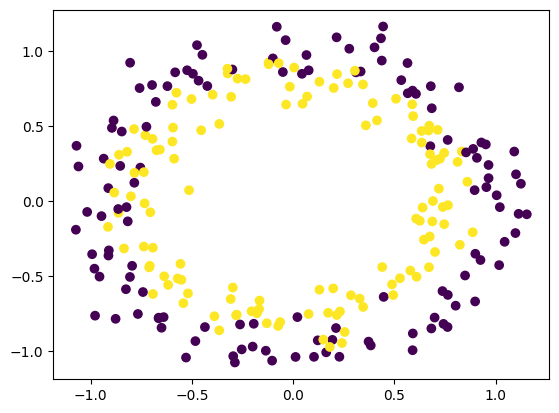

In [8]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [9]:
model = Sequential()
model.add(Dense(256,activation="relu",input_dim=2))
model.add(Dense(1,activation="sigmoid"))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer =  "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [12]:
history =  model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 2000)

Epoch 1/2000
7/7 [==============================] - 6s 33ms/step - loss: 0.6949 - accuracy: 0.5100 - val_loss: 0.7011 - val_accuracy: 0.4800
Epoch 2/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.5100 - val_loss: 0.6974 - val_accuracy: 0.4800
Epoch 3/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6900 - accuracy: 0.5050 - val_loss: 0.6938 - val_accuracy: 0.4800
Epoch 4/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.6888 - accuracy: 0.5050 - val_loss: 0.6906 - val_accuracy: 0.4400
Epoch 5/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6879 - accuracy: 0.5000 - val_loss: 0.6894 - val_accuracy: 0.4800
Epoch 6/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.6871 - accuracy: 0.5150 - val_loss: 0.6880 - val_accuracy: 0.5800
Epoch 7/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6859 - accuracy: 0.5200 - val_loss: 0.6876 - val_accuracy: 0.5800
Epoch 8/2000
7/

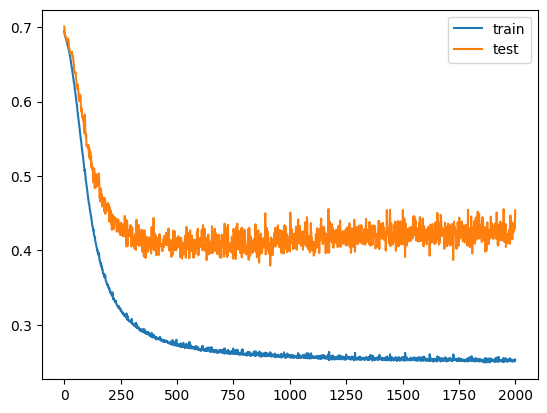

In [13]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

After around 200 epochs there's the difference in loss of train and test data due to which variance is introduced

In [15]:
#early stopping
model1 = Sequential()
model1.add(Dense(256,activation="relu",input_dim=2))
model1.add(Dense(1,activation="sigmoid"))
model1.compile(optimizer =  "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [16]:
callbacks = EarlyStopping(monitor='val_loss', #what do you want to monitor?
                          min_delta=0.0001, #learning rate
                          patience=50, #after how many times continuesly the variance keeps increasing between test and train you want to stop
                          verbose=1, #0 means you dont want to see epochs and 1 means you want to see each iteration of epochs
                          mode='auto',
                          baseline=None,
                          restore_best_weights=False,
                          start_from_epoch=0)

In [17]:
history =  model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 2000,callbacks=callbacks)

Epoch 1/2000
7/7 [==============================] - 1s 31ms/step - loss: 0.6936 - accuracy: 0.5050 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6912 - accuracy: 0.5100 - val_loss: 0.6883 - val_accuracy: 0.5200
Epoch 3/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.6909 - accuracy: 0.5150 - val_loss: 0.6853 - val_accuracy: 0.5400
Epoch 4/2000
7/7 [==============================] - 0s 8ms/step - loss: 0.6885 - accuracy: 0.5150 - val_loss: 0.6869 - val_accuracy: 0.5800
Epoch 5/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.6868 - accuracy: 0.5350 - val_loss: 0.6878 - val_accuracy: 0.6200
Epoch 6/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6864 - accuracy: 0.5450 - val_loss: 0.6890 - val_accuracy: 0.5400
Epoch 7/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.6050 - val_loss: 0.6883 - val_accuracy: 0.5400
Epoch 8/2000
7/7

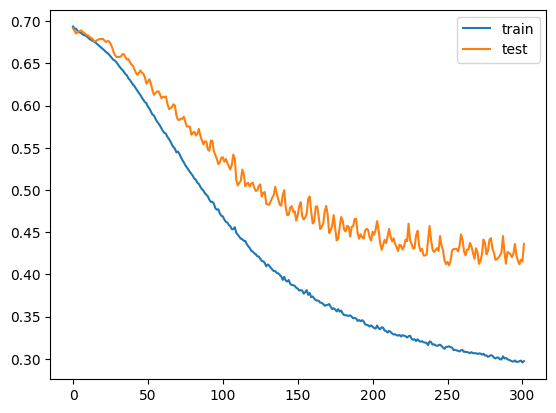

In [18]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()
#early stopping helped in reducing computation time and variance is reduced.

9600/9600 [==============================] - 20s 2ms/step


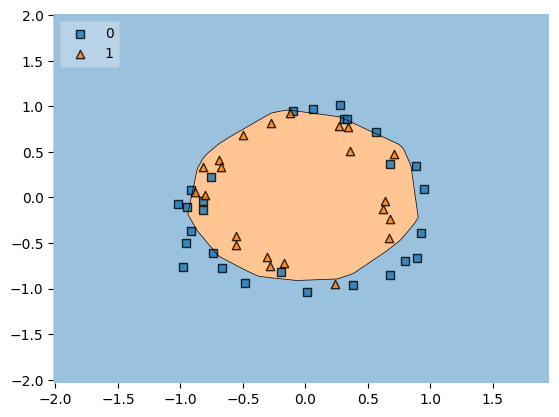

In [21]:
plot_decision_regions(x_test,y_test.ravel(),clf = model1,legend = 2)
plt.show()

9600/9600 [==============================] - 18s 2ms/step


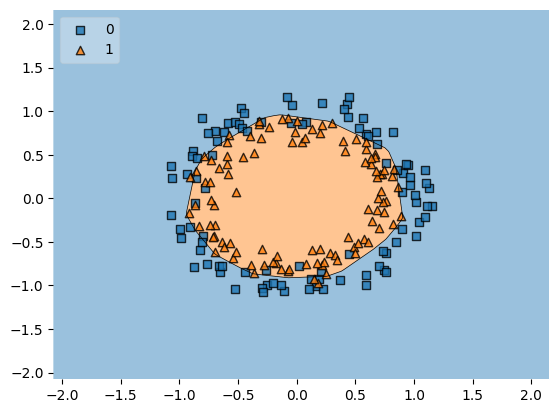

In [22]:
plot_decision_regions(x_train,y_train.ravel(),clf = model1,legend = 2)
plt.show()